In [1]:
import torch
from dpm.models import MultinomialNaiveBayes
from dpm.distributions import Categorical, Distribution
from dpm.visualize import plot_stats
import numpy as np

In [2]:
n_classes, n_features, n_states = (4, 3, 5)

In [3]:
model = MultinomialNaiveBayes(n_classes=n_classes, n_features=n_features, n_states=n_states)

In [4]:
model.y_dist.probs.shape, model.x_dist[0].probs.shape

(torch.Size([4]), torch.Size([3, 5]))

In [5]:
model.sample(3)

tensor([[4, 4, 3],
        [0, 1, 0],
        [4, 1, 3]])

In [6]:
y = torch.cat([i*torch.ones(1000) for i in range(n_classes)]).view(-1, 1).float()
y.shape

torch.Size([4000, 1])

In [7]:
ps = [0.05, 0.27, 0.65, 0.85]
x = torch.cat([torch.tensor(np.random.binomial(size=(1000, n_features), n=n_states-1, p=ps[i]))
               for i in range(n_classes)], dim=0).float()
x.shape

torch.Size([4000, 3])

In [8]:
stats = model.fit(x, y)

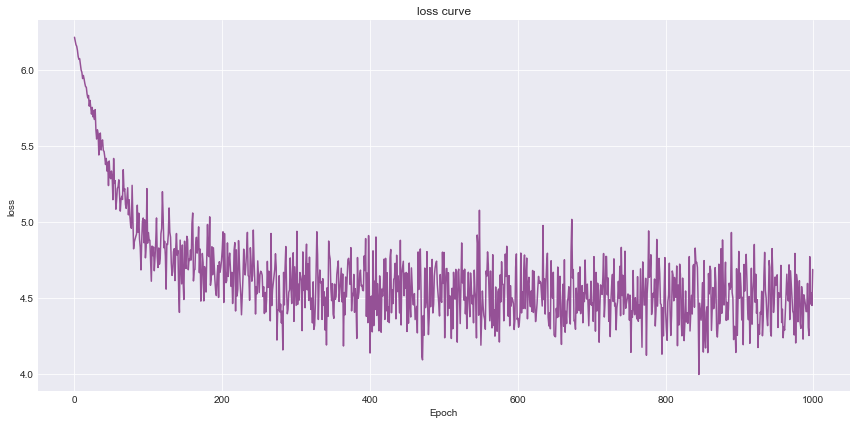

In [9]:
plot_stats(stats)

In [10]:
print(model.y_dist.probs) 
for i in range(n_classes):
    print(model.x_dist[i].probs)

tensor([0.2539, 0.2437, 0.2470, 0.2553], grad_fn=<SoftmaxBackward>)
tensor([[0.7888, 0.1780, 0.0232, 0.0050, 0.0050],
        [0.8077, 0.1705, 0.0117, 0.0054, 0.0047],
        [0.8023, 0.1705, 0.0175, 0.0049, 0.0049]], grad_fn=<SoftmaxBackward>)
tensor([[0.2728, 0.4019, 0.2613, 0.0561, 0.0079],
        [0.2991, 0.4356, 0.2085, 0.0494, 0.0074],
        [0.2771, 0.4505, 0.2201, 0.0435, 0.0089]], grad_fn=<SoftmaxBackward>)
tensor([[0.0187, 0.1111, 0.3292, 0.3912, 0.1499],
        [0.0145, 0.1236, 0.2847, 0.4144, 0.1629],
        [0.0249, 0.1191, 0.2939, 0.3863, 0.1758]], grad_fn=<SoftmaxBackward>)
tensor([[0.0063, 0.0109, 0.0916, 0.3526, 0.5385],
        [0.0054, 0.0169, 0.0775, 0.3795, 0.5207],
        [0.0056, 0.0125, 0.0906, 0.3885, 0.5027]], grad_fn=<SoftmaxBackward>)


In [11]:
(model.predict(x) == y.long()).float().mean()

tensor(0.7975)

In [12]:
model.predict(model.sample(5))

tensor([[2],
        [0],
        [2],
        [2],
        [1]])